In [1]:
"""
This program is used to visualize the semantic meaning change of "coronavirus"
25 May 2021
Yuting Chen
"""

from gensim.models import Word2Vec
import gensim
import pandas as pd
import numpy as np
from datetime import datetime

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import os
def select_path():
    path_Mac = '/Users/yutingchen/colorful_life/Research/Corona/data/'
    path_AWS = "C:/Users/Administrator/Documents/data/"
    if os.path.exists(path_Mac):
#         print("Using the Mac data path")
        device_path = path_Mac
    elif os.path.exists(path_AWS):
#         print("Using the AWS data path")
        device_path = path_AWS
    return device_path
select_path()

'C:/Users/Administrator/Documents/data/'

In [3]:
# load the trained embedding models
path_embedding = select_path()+"Temp/Embedding/"
files= os.listdir(path_embedding)
print(len(files))

458


In [4]:
%%time
l_dates = []
l_models = []
for file in files:
    if file.endswith('embedding_covidnews.model'):
        date = file[:8]
        date = datetime. strptime(date, '%Y%m%d')
        l_dates.append(date)
        model = Word2Vec.load(path_embedding+file)
        l_models.append(model)
        print(date)

2020-03-01 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-07 00:00:00
2020-03-08 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-14 00:00:00
2020-03-15 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00
2020-03-21 00:00:00
2020-03-22 00:00:00
2020-03-23 00:00:00
2020-03-24 00:00:00
2020-03-25 00:00:00
2020-03-26 00:00:00
2020-03-27 00:00:00
2020-03-28 00:00:00
2020-03-29 00:00:00
2020-03-30 00:00:00
2020-03-31 00:00:00
2020-04-01 00:00:00
2020-04-02 00:00:00
2020-04-03 00:00:00
2020-04-04 00:00:00
2020-04-05 00:00:00
2020-04-06 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-18 00:00:00
2020-04-19 00:00:00


2021-04-15 00:00:00
2021-04-16 00:00:00
2021-04-17 00:00:00
2021-04-18 00:00:00
2021-04-19 00:00:00
2021-04-20 00:00:00
2021-04-21 00:00:00
2021-04-22 00:00:00
2021-04-23 00:00:00
2021-04-24 00:00:00
2021-04-25 00:00:00
Wall time: 4min 48s


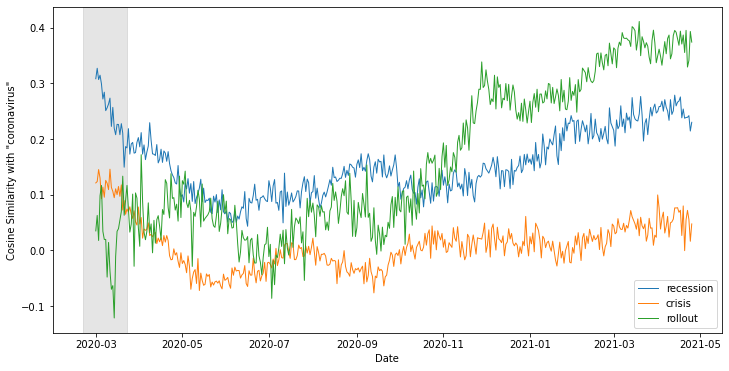

           recession    crisis   rollout  worsening
recession   1.000000  0.711126  0.572053   0.174039
crisis      0.711126  1.000000  0.348438   0.340165
rollout     0.572053  0.348438  1.000000   0.021451
worsening   0.174039  0.340165  0.021451   1.000000
Wall time: 1.1 s


In [5]:
%%time
import matplotlib.pyplot as plt
df_sim = pd.DataFrame()
list_date = []
list_sim1 = []
list_sim2 = []
list_sim3 = []
list_sim4 = []

# list_sim_covid_crisis = []
for i in range(len(l_dates)):
    date = l_dates[i]
    model = l_models[i]
    list_date.append(date)
    list_sim1.append(model.wv.similarity('coronavirus', 'recession'))
    list_sim2.append(model.wv.similarity('coronavirus', 'crisis'))
    list_sim3.append(model.wv.similarity('coronavirus', 'rollout'))
    list_sim4.append(model.wv.similarity('coronavirus', 'worsening'))

#     print("Cosine similarity between 'coronavirus' " + 
#                "and 'crisis' - CBOW : ", 
#     model.wv.similarity('coronavirus', 'crisis')) 

# print("most similar words with coronavirus : ", 
#       model1.wv.most_similar('coronavirus')[:10])
df_sim['date'] = list_date
df_sim['recession'] = list_sim1
df_sim['crisis'] = list_sim2
df_sim['rollout'] = list_sim3
df_sim['worsening'] = list_sim4

df_sim = df_sim.set_index('date')
# df_sim.plot(figsize=(12,6))  

fig, ax = plt.subplots(figsize=(12, 6))

crashstart = datetime(2020, 2, 21) 
crashend = datetime(2020, 3, 23)
ax.axvspan(crashstart, crashend, alpha=0.2, color='grey')

# Add x-axis and y-axis
ax.plot(df_sim.index.values,df_sim[df_sim.columns[0]],label=df_sim.columns[0],linewidth=1)
ax.plot(df_sim.index.values,df_sim[df_sim.columns[1]],label=df_sim.columns[1],linewidth=1)
ax.plot(df_sim.index.values,df_sim[df_sim.columns[2]],label=df_sim.columns[2],linewidth=1)
# ax.plot(df_sim.index.values,df_sim[df_sim.columns[3]],label=df_sim.columns[3],linewidth=1)
plt.legend()

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel='Cosine Similarity with "coronavirus"')

plt.show()
fig.savefig('smantic_similarity.png',bbox_inches=None)

print(df_sim.corr())

In [ ]:
from sklearn.manifold import TSNE
import matplotlib. pyplot as plt
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word,topn=50)
#     print(close_words)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    fig = plt.figure(1, figsize=(10, 6))
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points',size=10)
        plt.xlim(x_coords.min()+0.05, x_coords.max()+0.05)
        plt.ylim(y_coords.min()+0.05, y_coords.max()+0.05)
    plt.show()
#     fig.savefig('tsne_tweets.png',bbox_inches=None)

display_closestwords_tsnescatterplot(l_models[0], 'coronavirus', 100) 

In [ ]:
# plot wordcloud of the most similar words to coronavirus
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
stopwords = set(STOPWORDS)

text = ''
for i in range(len(l_dates)):
    model = l_models[i]
    close_words = model.wv.similar_by_word('coronavirus',topn=10)
    for word in close_words:
        text = text + ' ' + word[0]


In [ ]:
from PIL import Image
char_mask = np.array(Image.open(path_embedding+"cloud_shape.jpg"))
image_colors = ImageColorGenerator(char_mask)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
#         max_font_size=40, 
        scale=3,
        mask=char_mask, 
        collocations=False,
        contour_color = 'black',
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(40, 24))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    # to recolour the image
#     plt.imshow(wordcloud.recolor(color_func=image_colors))
    plt.imshow(wordcloud)
    plt.show()
    return fig

fig = show_wordcloud(text)
fig.savefig('wordcloud_closewordsofcoronavirus.png',bbox_inches=None)

